<a href="https://colab.research.google.com/github/Katherine-Gatica-BS/Portafolio/blob/main/Red_Feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red feedforward



El propósito es programar una red feedforward básica, modificando su capacidad y ajustando hiper-parámetros. 

**Contexto del caso**  

A continuación, se desarrollará el proyecto utilizando las etapas de metodología CRISP.DM, para la toma de las mejores decisiones de la ejecución del proyecto. 

 

Este caso propone la utilización de Deep Learning para la clasificación de imágenes de prendas de vestir. 

 

Para contextualizar el caso, las empresas de moda han utilizado Deep Learning en su comercio electrónico para resolver muchos problemas, como el reconocimiento de ropa, la búsqueda de ropa y la recomendación. Un paso central para todas estas implementaciones es la clasificación de imágenes. Sin embargo, la clasificación de la ropa es una tarea desafiante ya que la ropa tiene muchas propiedades y la profundidad de la categorización de la ropa es muy complicada.          

                

Para este caso utilizaremos un conjunto de datos denominado Fashion-MNIST, que consta de imágenes en escala de grises de 28 × 28 de 70 000 productos de moda de 10 categorías, con 7000 imágenes por categoría. El conjunto de entrenamiento tiene 60 000 imágenes y el conjunto de prueba tiene 10 000 imágenes. Fashion-MNIST está destinado a servir como un reemplazo directo del conjunto de datos MNIST original para comparar algoritmos de aprendizaje automático, ya que comparte el mismo tamaño de imagen, formato de datos y la estructura de las divisiones de entrenamiento y prueba. El conjunto de datos está disponible gratuitamente en https://github.com/zalandoresearch/fashion-mnist.




# Parte 1. Diseñando e implementando estructura básica de una red feedforward (MLP)

1. Pueden **descargar dataset a utilizar según el caso práctico entregado** en el enunciado.
2. **Utilizar archivo Python**, como base para observar la implementación de: 
>* Función de activación específicamente ReLu.
>* Función de pérdida (Cross entropy)
>* Función de salida (Softmax)
3. Una vez revisado el proceso de cómo se cargan los datos, construcción de la arquitectura, y uso de las distintas funciones (Activación, pérdida y salida) proponemos el desafío de  **modificar la red para evaluar su desempeño con distintas funciones de activación** (ReLU, tanh y sigmoid/logística), **diferentes profundidades** (cantidad de capas ocultas) y **cantidad de neuronas por capas.**

**NOTA**: Pueden añadir, tantas celdas de código como estimes conveniente para tu arquitectura.




In [ ]:
# Importamos librerías necesarias

from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from PIL import Image
import keras
from keras import regularizers
from keras.callbacks import EarlyStopping
from tensorflow import keras

In [ ]:
#########################################################
#Lectura

(img, labs), _ = keras.datasets.fashion_mnist.load_data()
print(img.shape)
print(labs.shape)

(60000, 28, 28)
(60000,)


<ipython-input-9-d64684016369>:5: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  img_bw = np.array([Image.fromarray(im).convert('L') for im in img])
<ipython-input-9-d64684016369>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img_bw = np.array([Image.fromarray(im).convert('L') for im in img])


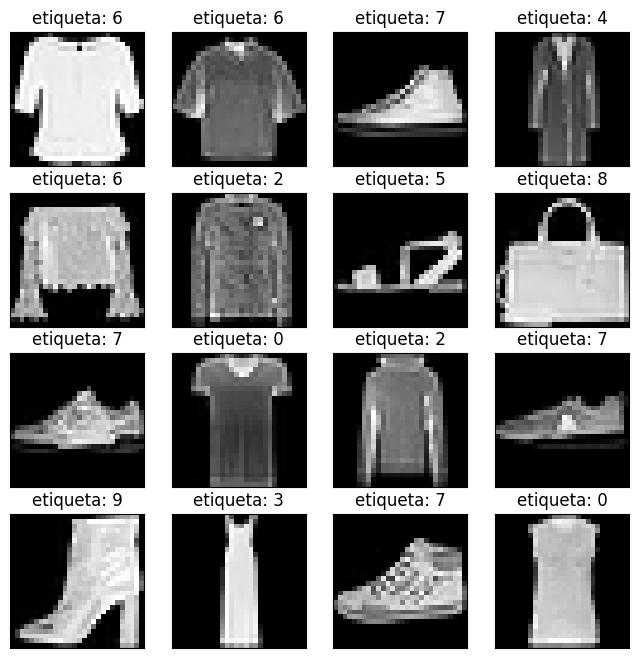

In [ ]:
#########################################
#Cargar código base para la implementación de la red

# Convertir las imágenes a blanco y negro
img_bw = np.array([Image.fromarray(im).convert('L') for im in img])

h = 4  # alto de la grilla
w = 4  # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(2 * h, 2 * w))
for i in range(h):
    for j in range(w):
        ex = np.random.randint(len(img_bw))
        axs[i, j].set_title("etiqueta: " + str(labs[ex]))
        axs[i, j].set_xticks([])
        axs[i, j].set_yticks([])
        axs[i, j].grid(False)
        axs[i, j].imshow(img_bw[ex], cmap='gray')
#########################################

In [ ]:
print(img.shape)
print(img.dtype)

(60000, 28, 28)
uint8


In [ ]:
# Tranformamos los datos para el entrenamiento

# los X's los cambiamos a vectores de una dimension
# y luego normalizamos
X = img.reshape(60000,28*28)
X = X / 255
print(X.shape)

# los Y's los cambiamos a vecotres de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(60000, 784)
(60000, 10)


## Probando las distintas funciones de activación de la red

*   Capa 1 ReLu
*   Capa 2 Tanh
*   Capa 3 Sigmoid


In [ ]:
#########################################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)


h1 = 128
h2 = 128
h3 = 128


red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()
#########################################

60000 784 10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 128)               100480    
                                                                 
 segunda_capa (Dense)        (None, 128)               16512     
                                                                 
 tercera_capa (Dense)        (None, 128)               16512     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#########################################

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)



h = red.fit(X, Y,
        epochs=20,
        batch_size=128,
        validation_data=(X,Y)
       )


#########################################

Epoch 1/20
469/469 [==============================] - 9s 16ms/step - loss: 1.9272 - accuracy: 0.5237 - val_loss: 1.4874 - val_accuracy: 0.6460
Epoch 2/20
469/469 [==============================] - 8s 16ms/step - loss: 1.2246 - accuracy: 0.6787 - val_loss: 1.0362 - val_accuracy: 0.7106
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.9318 - accuracy: 0.7258 - val_loss: 0.8485 - val_accuracy: 0.7431
Epoch 4/20
469/469 [==============================] - 5s 12ms/step - loss: 0.7933 - accuracy: 0.7478 - val_loss: 0.7465 - val_accuracy: 0.7582
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.7130 - accuracy: 0.7621 - val_loss: 0.6822 - val_accuracy: 0.7680
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.6590 - accuracy: 0.7752 - val_loss: 0.6370 - val_accuracy: 0.7816
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6190 - accuracy: 0.7873 - val_loss: 0.6013 - val_accuracy: 0.7909
E



---


*   Capa 1 Tanh
*   Capa 2 Sigmoid
*   Capa 3 ReLu

In [ ]:
#########################################
# Modificar la cantidad de capas ocultas entre 1 y 3, utilizando un tamaño fijo de 128 neuronas en cada una de ellas
#60000 datos de entrada


M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

# tamaños de capas escondidas

h1 = 128
h2 = 128
h3 = 128


# nuestra red feed-forward  (ajuste de red de parametros)

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='sigmoid', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='relu', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()
#########################################

60000 784 10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 128)               100480    
                                                                 
 segunda_capa (Dense)        (None, 128)               16512     
                                                                 
 tercera_capa (Dense)        (None, 128)               16512     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#########################################
# Combinar las distintas funciones de activación y cantidad de capas ocultas de la red
# Entrenar por 20 épocas y evaluar el rendimiento de la red

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=20,
        batch_size=128,
        validation_data=(X,Y)
       )


#########################################

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.9157 - accuracy: 0.4916 - val_loss: 1.4466 - val_accuracy: 0.6058
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 1.1841 - accuracy: 0.6569 - val_loss: 1.0076 - val_accuracy: 0.6939
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.9100 - accuracy: 0.7114 - val_loss: 0.8276 - val_accuracy: 0.7321
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.7687 - accuracy: 0.7444 - val_loss: 0.7187 - val_accuracy: 0.7588
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.6840 - accuracy: 0.7632 - val_loss: 0.6536 - val_accuracy: 0.7705
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.6309 - accuracy: 0.7784 - val_loss: 0.6088 - val_accuracy: 0.7855
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.5940 - accuracy: 0.7887 - val_loss: 0.5786 - val_accuracy: 0.7925
Epo



---


*   Capa 1 Sigmoid
*   Capa 2 ReLu
*   Capa 3 Tanh

In [ ]:
#########################################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)


h1 = 128
h2 = 128
h3 = 128


red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='tanh', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.summary()




60000 784 10
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 128)               100480    
                                                                 
 segunda_capa (Dense)        (None, 128)               16512     
                                                                 
 tercera_capa (Dense)        (None, 128)               16512     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=20,
        batch_size=128,
        validation_data=(X,Y)
       )


Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 1.7572 - accuracy: 0.5299 - val_loss: 1.2405 - val_accuracy: 0.6381
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 1.0289 - accuracy: 0.6885 - val_loss: 0.8830 - val_accuracy: 0.7157
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.8033 - accuracy: 0.7351 - val_loss: 0.7413 - val_accuracy: 0.7442
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.6984 - accuracy: 0.7554 - val_loss: 0.6637 - val_accuracy: 0.7649
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.6411 - accuracy: 0.7693 - val_loss: 0.6207 - val_accuracy: 0.7725
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.6051 - accuracy: 0.7813 - val_loss: 0.5907 - val_accuracy: 0.7845
Epoch 7/20
469/469 [==============================] - 4s 7ms/step - loss: 0.5786 - accuracy: 0.7910 - val_loss: 0.5699 - val_accuracy: 0.7951
Epoc

4. Resultados obtenidos
**Ingresar los resultados obtenidos** en la siguiente tabla: 

Hacer doble clic en la tabla y completar los valores dentro de las llaves de las líneas así:
>* Ejemplo:\hline \text{ 1 capa oculta }& {7} & {8} & {1} & {3} & {0} & {5} \\


---


$$
\begin{aligned}
& \hspace{60mm} \text  {Tabla 1.1. Rendimiento redes FeedForward }\\
&\begin{array}{cccc}
\hline \hline \text {     } & \text { ReLu } & \text { Tanh } & \text { Sigmoid } \\
\hline \hline \text {     } & \text { val_acc }\hspace{10mm}  { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } \\
\hline \text{1 capa oculta }& {0.8971 - 146,158 s} & {0.8474-103,166 s} & {0.8419-94,228 s} & {} & {} & {} \\
\text{ 2 capas ocultas } & {0.8419-94,228 s} & {0.8971- 146,158 s} & {0.8474-103,166 s} & {} & {} & {} \\
\text{ 3 capas ocultas } & {0.8474-103,166 s} & {0.8419-94,228 s} & {0.8971- 146,158 s} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

5. Análisis de resultados   

**Comparar y fundamentar los resultados de rendimiento de la red con las diferentes funciones de activación contestando las siguientes preguntas:**
* **¿Existieron cambios significativos en el tiempo de entrenamiento?** Fundamenta tu respuesta.


***Existieron algunas diferencias en el tiempo de entrenamiento, pero estas no parecen ser muy significativas entre las diferentes capas que utilizamos las funciones de activación.***

**Tiempo de entrenamiento:**


*   ReLU: Se obtuvo un tiempo de entrenamiento de 146.158 segundos en la mejor combinación de funciones de activación en las tres capas ocultas.


*   Tanh: El tiempo de entrenamiento fue de 103.166 segundos en la mejor combinación.

*   Sigmoid: El tiempo de entrenamiento fue de 94.228 segundos en la mejor combinación.


***La función de activación ReLU mostró el mayor tiempo de entrenamiento, seguida por Tanh y Sigmoid, que tuvieron tiempos de entrenamiento más cortos.
Pero esto es solo en base al tiempo de ejecucción.***




---




* **¿Cuál fue el impacto en la precisión de la clasificación?** Fundamenta tu respuesta.


***El impacto en la precisión de la clasificación se puede observar al analizar los valores de val_acc, de igual forma podemos observar que no hay una función de activación que sea consistentemente superior en todas las configuraciones de capas ocultas.***


Con función de activación ReLU:
*   Una capa oculta: val_acc = 0.8971
*   Dos capas ocultas: val_acc = 0.8419
*   Tres capas ocultas: val_acc = 0.8474

Con función de activación Tanh:
*   Una capa oculta: val_acc = 0.8474
*   Dos capas ocultas: val_acc = 0.8971
*   Tres capas ocultas: val_acc = 0.8419

Con función de activación Sigmoid:
*   Una capa oculta: val_acc = 0.8419
*   Dos capas ocultas: val_acc = 0.8474
*   Tres capas ocultas: val_acc = 0.8971


***La mejor mezcla de funciones de activación en las 3 capas es cuando se utiliza ReLu en la primera capa oculta, Tanh en la segunda capa oculta y Sigmoid en la tercera capa oculta. Esta combinación logra una precisión de validación (val_acc) más alta en comparación con las otras combinaciones en todas las configuraciones de capas ocultas.***



---



* **De acuerdo a lo aprendido y experimentado en tiempos de entrenamiento, ¿por qué se producen diferencias entre una función y otra?**



***Las diferencias en el rendimiento de las diferentes funciones de activación se deben a sus características y propiedades únicas. Cada función de activación tiene un comportamiento particular que afecta la forma en que la red neuronal aprende y realiza la clasificación. también influyen en la propagación de gradientes durante el entrenamiento mediante retropropagación. Algunas funciones de activación, como la ReLU, pueden permitir un flujo más rápido de gradientes, lo que puede acelerar el entrenamiento.***

***Recordemos también que las funciones de activación existen para introducir no linealidad en la red neuronal. La función ReLU es lineal en su parte positiva, mientras que las funciones Sigmoid y Tanh son no lineales en todo su rango. Esta no linealidad permite que la red aprenda relaciones más complejas y no lineales en los datos de entrada.***

***Estas son solo algunas de las razones por las cuales se producen diferencias en el rendimiento entre diferentes funciones de activación.***



---



##RELU

In [ ]:
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 128

red_relu = keras.Sequential()
red_relu.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa_relu'))
red_relu.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output_relu'))


red.summary()

60000 784 10
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 128)               100480    
                                                                 
 segunda_capa (Dense)        (None, 128)               16512     
                                                                 
 tercera_capa (Dense)        (None, 128)               16512     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________




---
##TANH

In [ ]:
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 128

red_tanh = keras.Sequential()
red_tanh.add(keras.layers.Dense(h1, input_dim=N, activation='tanh', name='primera_capa_tanh'))
red_tanh.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output_tanh'))


red.summary()

60000 784 10
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 128)               100480    
                                                                 
 segunda_capa (Dense)        (None, 128)               16512     
                                                                 
 tercera_capa (Dense)        (None, 128)               16512     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________




---
##SIGMOID

In [ ]:
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 128

red_sigmoid = keras.Sequential()
red_sigmoid.add(keras.layers.Dense(h1, input_dim=N, activation='sigmoid', name='primera_capa_sigmoid'))
red_sigmoid.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output_sigmoid'))

red.summary()

60000 784 10
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 128)               100480    
                                                                 
 segunda_capa (Dense)        (None, 128)               16512     
                                                                 
 tercera_capa (Dense)        (None, 128)               16512     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


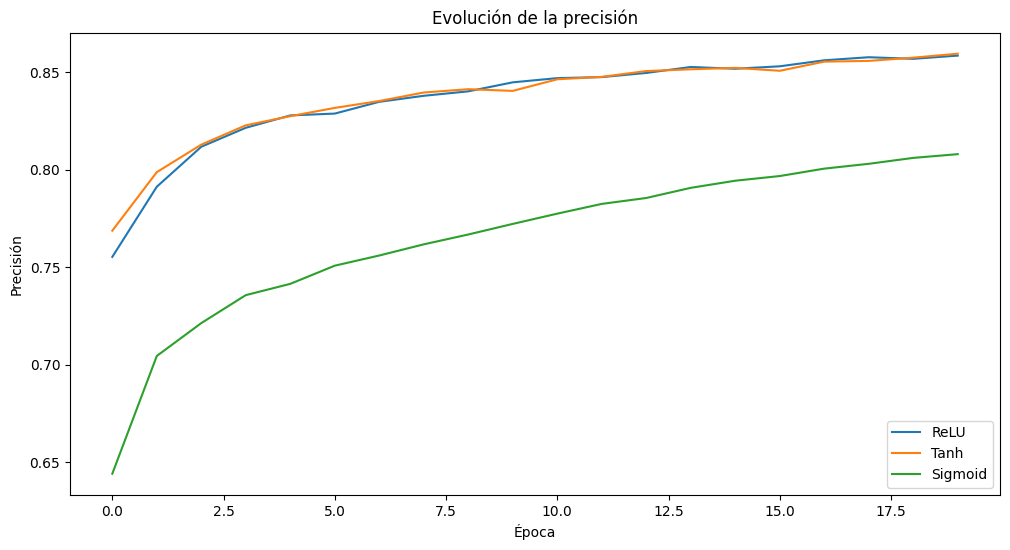

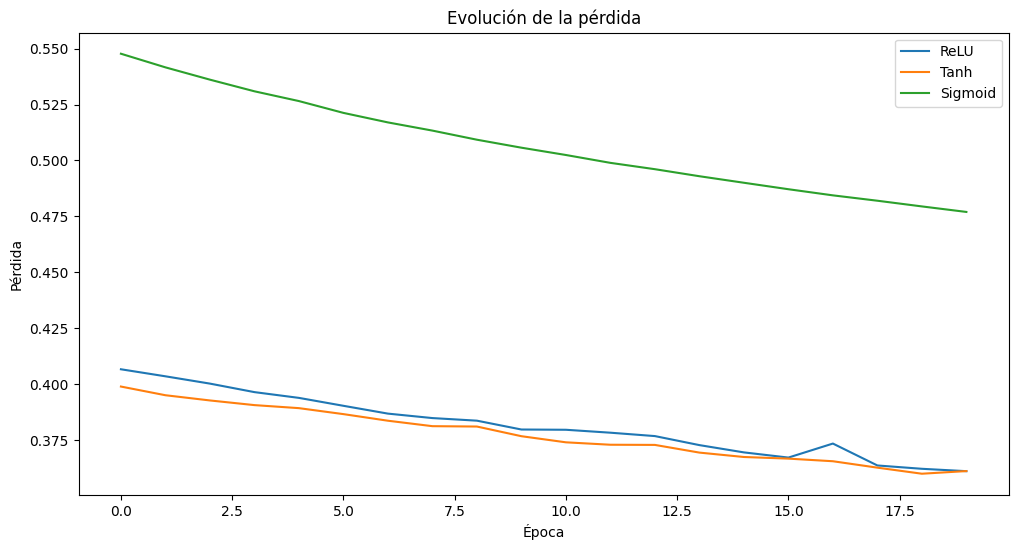

In [ ]:
red_models = [red_relu, red_tanh, red_sigmoid]
activation_labels = ['ReLU', 'Tanh', 'Sigmoid']

plt.figure(figsize=(12, 6))

for i, model in enumerate(red_models):
    model.compile(
        loss='categorical_crossentropy',
        optimizer='sgd',
        metrics=['accuracy']
    )

    historia = model.fit(X, Y,
                         epochs=20,
                         batch_size=128,
                         validation_data=(X, Y),
                         verbose=0
                         )

    plt.plot(historia.history['val_accuracy'], label=f'{activation_labels[i]}')

plt.title('Evolución de la precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize=(12, 6))

for i, model in enumerate(red_models):
    model.compile(
        loss='categorical_crossentropy',
        optimizer='sgd',
        metrics=['accuracy']
    )

    historia = model.fit(X, Y,
                         epochs=20,
                         batch_size=128,
                         validation_data=(X, Y),
                         verbose=0
                         )

    plt.plot(historia.history['val_loss'], label=f'{activation_labels[i]}')

plt.title('Evolución de la pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

Conclusiones:

Se puede observar cómo la precisión va mejorando a medida que se incrementan las épocas de entrenamiento y en el mismo caso, en el gráfico de evolución de la pérdida, se puede observar cómo la pérdida va disminuyendo a medida que se incrementan las épocas de entrenamiento.

*   ReLU: Se observa que tiene una rápida mejora en la precisión y disminución de la pérdida en las primeras épocas, alcanzando una alta precisión y una baja pérdida al final del entrenamiento.

*   Tanh: Se muestra una mejora más gradual en la precisión y una disminución lenta en la pérdida a medida que aumentan las épocas. Al final del entrenamiento, logra una precisión relativamente alta y una pérdida moderada.

*   Sigmoid: También muestra una mejora gradual en la precisión y una disminución lenta en la pérdida. Al final del entrenamiento, alcanza una precisión similar al modelo con Tanh, pero con una pérdida ligeramente mayor.






# Parte 2. Mejorando el accuracy del Modelo Red Neuronal feedforward fully connected (MLP) 

**Entrenar la red (MLP), modificando su capacidad, completando la siguiente tabla con el primero y último entrenamiento**.




##Primer entrenamiento
*   3 capas
*   función de activación: 1 capa relu, 2da capa Tanh, 3ra sigmoid
*   Optimizador: SGD
*   20 epocas

In [ ]:
###############################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 512
h2 = 256
h3 = 128

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=20,
        batch_size=128,
        validation_data=(X, Y),
       )


###############################

60000 784 10
Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 1.6884 - accuracy: 0.5835 - val_loss: 1.2305 - val_accuracy: 0.7056
Epoch 2/20
469/469 [==============================] - 7s 16ms/step - loss: 1.0361 - accuracy: 0.7158 - val_loss: 0.8983 - val_accuracy: 0.7330
Epoch 3/20
469/469 [==============================] - 9s 18ms/step - loss: 0.8225 - accuracy: 0.7406 - val_loss: 0.7616 - val_accuracy: 0.7491
Epoch 4/20
469/469 [==============================] - 9s 18ms/step - loss: 0.7203 - accuracy: 0.7606 - val_loss: 0.6849 - val_accuracy: 0.7696
Epoch 5/20
469/469 [==============================] - 8s 16ms/step - loss: 0.6563 - accuracy: 0.7759 - val_loss: 0.6305 - val_accuracy: 0.7839
Epoch 6/20
469/469 [==============================] - 9s 18ms/step - loss: 0.6103 - accuracy: 0.7905 - val_loss: 0.5903 - val_accuracy: 0.7968
Epoch 7/20
469/469 [==============================] - 10s 22ms/step - loss: 0.5745 - accuracy: 0.8026 - val_loss: 0.5583 - val_a



---

##Segundo entrenamiento
*   3 capas 
*   función de activación: 1 capa relu, 2da capa Tanh, 3ra sigmoid
*   Optimizador: ADAM
*   20 epocas


In [ ]:
###############################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 512
h2 = 256
h3 = 128

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=20,
        batch_size=128,
        validation_data=(X, Y),
       )


###############################

60000 784 10
Epoch 1/20
469/469 [==============================] - 12s 23ms/step - loss: 0.5117 - accuracy: 0.8207 - val_loss: 0.3543 - val_accuracy: 0.8708
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.3521 - accuracy: 0.8721 - val_loss: 0.3142 - val_accuracy: 0.8873
Epoch 3/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3172 - accuracy: 0.8826 - val_loss: 0.2898 - val_accuracy: 0.8919
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2896 - accuracy: 0.8920 - val_loss: 0.2707 - val_accuracy: 0.8978
Epoch 5/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2692 - accuracy: 0.9000 - val_loss: 0.2534 - val_accuracy: 0.9057
Epoch 6/20
469/469 [==============================] - 9s 20ms/step - loss: 0.2558 - accuracy: 0.9048 - val_loss: 0.2377 - val_accuracy: 0.9109
Epoch 7/20
469/469 [==============================] - 9s 20ms/step - loss: 0.2445 - accuracy: 0.9084 - val_loss: 0.2103 - val



---


##Tercer Entrenamiento
*   3 capas 
*   función de activación: 1 capa relu, 2da capa Tanh, 3ra sigmoid
*   Optimizador: RMsPro
*   20 epocas

In [ ]:
###############################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 512
h2 = 256
h3 = 128

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=20,
        batch_size=128,
        validation_data=(X, Y),
       )


###############################

60000 784 10
Epoch 1/20
469/469 [==============================] - 10s 20ms/step - loss: 0.5607 - accuracy: 0.7969 - val_loss: 0.4066 - val_accuracy: 0.8531
Epoch 2/20
469/469 [==============================] - 9s 20ms/step - loss: 0.3851 - accuracy: 0.8577 - val_loss: 0.3644 - val_accuracy: 0.8594
Epoch 3/20
469/469 [==============================] - 9s 20ms/step - loss: 0.3420 - accuracy: 0.8734 - val_loss: 0.3146 - val_accuracy: 0.8826
Epoch 4/20
469/469 [==============================] - 10s 20ms/step - loss: 0.3135 - accuracy: 0.8835 - val_loss: 0.2841 - val_accuracy: 0.8962
Epoch 5/20
469/469 [==============================] - 8s 18ms/step - loss: 0.2935 - accuracy: 0.8889 - val_loss: 0.2869 - val_accuracy: 0.8931
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2784 - accuracy: 0.8947 - val_loss: 0.2752 - val_accuracy: 0.8964
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2647 - accuracy: 0.8982 - val_loss: 0.2566 - val



---


##Cuarto Entrenamiento
*   4 capas 
*   función de activación: 1 capa relu, 2da capa Tanh, 3ra sigmoid, 4 capa relu
*   Optimizador: SGD
*   25 epocas

In [ ]:
###############################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=25,
        batch_size=128,
        validation_data=(X, Y),
       )


###############################

60000 784 10
Epoch 1/25
469/469 [==============================] - 8s 15ms/step - loss: 1.9131 - accuracy: 0.5176 - val_loss: 1.3938 - val_accuracy: 0.6367
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 1.1171 - accuracy: 0.6738 - val_loss: 0.9334 - val_accuracy: 0.6988
Epoch 3/25
469/469 [==============================] - 7s 14ms/step - loss: 0.8337 - accuracy: 0.7272 - val_loss: 0.7542 - val_accuracy: 0.7396
Epoch 4/25
469/469 [==============================] - 7s 14ms/step - loss: 0.7042 - accuracy: 0.7557 - val_loss: 0.6599 - val_accuracy: 0.7673
Epoch 5/25
469/469 [==============================] - 6s 12ms/step - loss: 0.6318 - accuracy: 0.7747 - val_loss: 0.6067 - val_accuracy: 0.7824
Epoch 6/25
469/469 [==============================] - 7s 14ms/step - loss: 0.5857 - accuracy: 0.7900 - val_loss: 0.5672 - val_accuracy: 0.7970
Epoch 7/25
469/469 [==============================] - 7s 14ms/step - loss: 0.5520 - accuracy: 0.8027 - val_loss: 0.5364 - val_acc



---


##Quinto Entrenamiento
*   4 capas 
*   función de activación: 1 capa relu, 2da capa Tanh, 3ra sigmoid, 4 capa relu
*   Optimizador: ADAM
*   25 epocas

In [ ]:
###############################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=25,
        batch_size=128,
        validation_data=(X, Y),
       )


###############################

60000 784 10
Epoch 1/25
469/469 [==============================] - 9s 16ms/step - loss: 0.5357 - accuracy: 0.8076 - val_loss: 0.3579 - val_accuracy: 0.8688
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3636 - accuracy: 0.8666 - val_loss: 0.3416 - val_accuracy: 0.8748
Epoch 3/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3254 - accuracy: 0.8796 - val_loss: 0.3009 - val_accuracy: 0.8867
Epoch 4/25
469/469 [==============================] - 8s 16ms/step - loss: 0.2989 - accuracy: 0.8892 - val_loss: 0.2787 - val_accuracy: 0.8966
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.2857 - accuracy: 0.8942 - val_loss: 0.2624 - val_accuracy: 0.9024
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2707 - accuracy: 0.8982 - val_loss: 0.2467 - val_accuracy: 0.9079
Epoch 7/25
469/469 [==============================] - 8s 16ms/step - loss: 0.2568 - accuracy: 0.9033 - val_loss: 0.2337 - val_acc



---


##Sexto Entrenamiento
*   4 capas 
*   función de activación: 1 capa relu, 2da capa Tanh, 3ra sigmoid, 4 capa relu
*   Optimizador: RMsPro
*   25 epocas

In [ ]:
###############################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=25,
        batch_size=128,
        validation_data=(X, Y),
       )


###############################

60000 784 10
Epoch 1/25
469/469 [==============================] - 9s 17ms/step - loss: 0.6152 - accuracy: 0.7725 - val_loss: 0.4978 - val_accuracy: 0.8135
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 0.4081 - accuracy: 0.8485 - val_loss: 0.3373 - val_accuracy: 0.8749
Epoch 3/25
469/469 [==============================] - 8s 18ms/step - loss: 0.3587 - accuracy: 0.8673 - val_loss: 0.3213 - val_accuracy: 0.8812
Epoch 4/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3295 - accuracy: 0.8781 - val_loss: 0.3096 - val_accuracy: 0.8867
Epoch 5/25
469/469 [==============================] - 7s 15ms/step - loss: 0.3080 - accuracy: 0.8842 - val_loss: 0.3093 - val_accuracy: 0.8809
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.2914 - accuracy: 0.8913 - val_loss: 0.2588 - val_accuracy: 0.9014
Epoch 7/25
469/469 [==============================] - 7s 16ms/step - loss: 0.2783 - accuracy: 0.8954 - val_loss: 0.2660 - val_acc



---


##Septimo Entrenamiento
*   5 capas 
*   función de activación: 1 capa relu, 2da capa Tanh, 3ra sigmoid, 4 capa relu, 5ta tanh
*   Optimizador: SGD
*   30 epocas

In [ ]:
###############################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 256
h2 = 256
h3 = 128
h4 = 128
h5 = 128

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(h4, activation='tanh', name='quinta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=30,
        batch_size=128,
        validation_data=(X, Y),
       )


###############################

60000 784 10
Epoch 1/30
469/469 [==============================] - 9s 17ms/step - loss: 1.6969 - accuracy: 0.4842 - val_loss: 1.1407 - val_accuracy: 0.6456
Epoch 2/30
469/469 [==============================] - 7s 14ms/step - loss: 0.9493 - accuracy: 0.6902 - val_loss: 0.8100 - val_accuracy: 0.7268
Epoch 3/30
469/469 [==============================] - 8s 17ms/step - loss: 0.7335 - accuracy: 0.7401 - val_loss: 0.6737 - val_accuracy: 0.7480
Epoch 4/30
469/469 [==============================] - 7s 14ms/step - loss: 0.6374 - accuracy: 0.7622 - val_loss: 0.6107 - val_accuracy: 0.7753
Epoch 5/30
469/469 [==============================] - 8s 17ms/step - loss: 0.5825 - accuracy: 0.7831 - val_loss: 0.5589 - val_accuracy: 0.7966
Epoch 6/30
469/469 [==============================] - 7s 14ms/step - loss: 0.5426 - accuracy: 0.8039 - val_loss: 0.5234 - val_accuracy: 0.8136
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.5129 - accuracy: 0.8153 - val_loss: 0.5054 - val_acc



---


##Octavo Entrenamiento
*   5 capas 
*   función de activación: 1 capa relu, 2da capa Tanh, 3ra sigmoid, 4 capa relu, 5ta tanh
*   Optimizador: ADAM
*   30 epocas

In [ ]:
###############################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 256
h2 = 256
h3 = 128
h4 = 128
h5 = 128

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(h4, activation='tanh', name='quinta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=30,
        batch_size=128,
        validation_data=(X, Y),
       )


###############################

60000 784 10
Epoch 1/30
469/469 [==============================] - 9s 17ms/step - loss: 0.5382 - accuracy: 0.8062 - val_loss: 0.3809 - val_accuracy: 0.8594
Epoch 2/30
469/469 [==============================] - 7s 16ms/step - loss: 0.3734 - accuracy: 0.8628 - val_loss: 0.3440 - val_accuracy: 0.8725
Epoch 3/30
469/469 [==============================] - 8s 18ms/step - loss: 0.3287 - accuracy: 0.8794 - val_loss: 0.2890 - val_accuracy: 0.8938
Epoch 4/30
469/469 [==============================] - 7s 16ms/step - loss: 0.3023 - accuracy: 0.8878 - val_loss: 0.2889 - val_accuracy: 0.8916
Epoch 5/30
469/469 [==============================] - 8s 17ms/step - loss: 0.2899 - accuracy: 0.8911 - val_loss: 0.2687 - val_accuracy: 0.8986
Epoch 6/30
469/469 [==============================] - 8s 16ms/step - loss: 0.2742 - accuracy: 0.8969 - val_loss: 0.2542 - val_accuracy: 0.9038
Epoch 7/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2566 - accuracy: 0.9042 - val_loss: 0.2611 - val_acc



---


##Noveno Entrenamiento
*   5 capas 
*   función de activación: 1 capa relu, 2da capa Tanh, 3ra sigmoid, 4 capa relu, 5ta tanh
*   Optimizador: RMsPro
*   30 epocas

In [ ]:
###############################

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

h1 = 256
h2 = 256
h3 = 128
h4 = 128
h5 = 128

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(h4, activation='tanh', name='quinta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))

red.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=30,
        batch_size=128,
        validation_data=(X, Y),
       )


###############################

60000 784 10
Epoch 1/30
469/469 [==============================] - 8s 16ms/step - loss: 0.6169 - accuracy: 0.7721 - val_loss: 0.4300 - val_accuracy: 0.8390
Epoch 2/30
469/469 [==============================] - 7s 14ms/step - loss: 0.4145 - accuracy: 0.8468 - val_loss: 0.3618 - val_accuracy: 0.8658
Epoch 3/30
469/469 [==============================] - 7s 16ms/step - loss: 0.3652 - accuracy: 0.8654 - val_loss: 0.3289 - val_accuracy: 0.8779
Epoch 4/30
469/469 [==============================] - 6s 13ms/step - loss: 0.3326 - accuracy: 0.8773 - val_loss: 0.3293 - val_accuracy: 0.8762
Epoch 5/30
469/469 [==============================] - 7s 16ms/step - loss: 0.3137 - accuracy: 0.8816 - val_loss: 0.2990 - val_accuracy: 0.8871
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.2968 - accuracy: 0.8878 - val_loss: 0.2869 - val_accuracy: 0.8870
Epoch 7/30
469/469 [==============================] - 7s 15ms/step - loss: 0.2820 - accuracy: 0.8943 - val_loss: 0.2553 - val_acc

6. Resultados obtenidos

**Deben completar los valores dentro de las llaves de las líneas así :**
>* Ejemplo: \hline \text{ 3 capas } & \text { 10 epocas} & {5} & {2} & {1} & {9} & {5} & {3} \\

---



$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.1. Rendimiento redes FeedForward }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsPro } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm}  { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } & \text { val_acc }\hspace{10mm} { tiempo_s } \\
\hline \text{ 3 capas } & \text { 20 epocas} & {0.8548 - 203,495 s} & {0.9527 - 203,495 s} & {0.9431 - 174,303 s} & {} & {} & {} \\
\text{ 4 capas } & \text { 25 epocas} & {0.8676-150,97 s} & {0.9470 - 204,462 s} & {0.9443 - 203,586 s} & {} & {} & {} \\
\text{ 5 capas } & \text { 30 epocas} & {0.8725 - 172,861 s} & {0.9638 - 203,626 s} & {0.9527 -202,384 s} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

7. Análisis de resultados   

La tabla muestra cómo los tres optimizadores (SGD, Adam y RMSprop) afectan el rendimiento de los modelos en términos de precisión. Esto permite comparar la eficacia de los diferentes algoritmos de optimización y determinar cuál de ellos es más adecuado para el problema en cuestión.

Precisión: En general, se observa que los modelos con un mayor número de capas y un mayor número de épocas tienden a tener una precisión más alta. Por ejemplo, el modelo con 5 capas y 30 épocas tiene la precisión más alta en general.

Tiempo de entrenamiento: Los modelos con un mayor número de capas y un mayor número de épocas tienden a requerir más tiempo de entrenamiento. Es importante considerar los recursos computacionales disponibles y el tiempo que se puede asignar al entrenamiento del modelo.

Optimizador: Se observa que los tres optimizadores (SGD, Adam y RMSprop) tienen resultados similares en términos de precisión. Sin embargo, puede ser útil explorar otros aspectos del rendimiento de los optimizadores, como su convergencia y su capacidad para evitar el estancamiento en mínimos locales.

**Crear un gráfico de entrenamiento (Accuracy, Loss)**



##Grafico Accuracy - Loss

60000 784 10
Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 1.7033 - accuracy: 0.5662 - val_loss: 1.2665 - val_accuracy: 0.6845
Epoch 2/20
469/469 [==============================] - 9s 19ms/step - loss: 1.0602 - accuracy: 0.7078 - val_loss: 0.9108 - val_accuracy: 0.7219
Epoch 3/20
469/469 [==============================] - 8s 18ms/step - loss: 0.8314 - accuracy: 0.7348 - val_loss: 0.7678 - val_accuracy: 0.7472
Epoch 4/20
469/469 [==============================] - 7s 15ms/step - loss: 0.7261 - accuracy: 0.7558 - val_loss: 0.6888 - val_accuracy: 0.7645
Epoch 5/20
469/469 [==============================] - 8s 18ms/step - loss: 0.6611 - accuracy: 0.7736 - val_loss: 0.6347 - val_accuracy: 0.7812
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.6142 - accuracy: 0.7879 - val_loss: 0.5939 - val_accuracy: 0.7955
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.5785 - accuracy: 0.8011 - val_loss: 0.5623 - val_acc

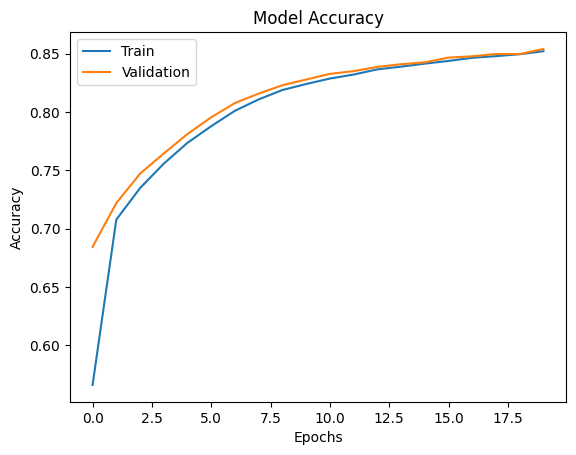

60000 784 10
Epoch 1/20
469/469 [==============================] - 19s 38ms/step - loss: 0.5114 - accuracy: 0.8206 - val_loss: 0.3784 - val_accuracy: 0.8609
Epoch 2/20
469/469 [==============================] - 12s 27ms/step - loss: 0.3517 - accuracy: 0.8724 - val_loss: 0.3203 - val_accuracy: 0.8840
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.3169 - accuracy: 0.8825 - val_loss: 0.2789 - val_accuracy: 0.8982
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.2878 - accuracy: 0.8929 - val_loss: 0.2730 - val_accuracy: 0.8984
Epoch 5/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2679 - accuracy: 0.9002 - val_loss: 0.2393 - val_accuracy: 0.9109
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2565 - accuracy: 0.9040 - val_loss: 0.2436 - val_accuracy: 0.9091
Epoch 7/20
469/469 [==============================] - 12s 25ms/step - loss: 0.2424 - accuracy: 0.9102 - val_loss: 0.2269 - v

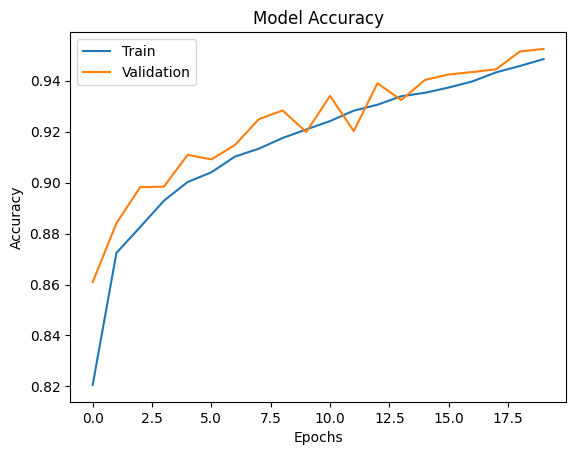

60000 784 10
Epoch 1/20
469/469 [==============================] - 11s 23ms/step - loss: 0.5590 - accuracy: 0.7958 - val_loss: 0.4058 - val_accuracy: 0.8515
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.3886 - accuracy: 0.8566 - val_loss: 0.3433 - val_accuracy: 0.8732
Epoch 3/20
469/469 [==============================] - 10s 21ms/step - loss: 0.3425 - accuracy: 0.8733 - val_loss: 0.2959 - val_accuracy: 0.8903
Epoch 4/20
469/469 [==============================] - 9s 19ms/step - loss: 0.3143 - accuracy: 0.8821 - val_loss: 0.2812 - val_accuracy: 0.8945
Epoch 5/20
469/469 [==============================] - 10s 20ms/step - loss: 0.2941 - accuracy: 0.8899 - val_loss: 0.2693 - val_accuracy: 0.8996
Epoch 6/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2782 - accuracy: 0.8939 - val_loss: 0.2871 - val_accuracy: 0.8889
Epoch 7/20
469/469 [==============================] - 10s 21ms/step - loss: 0.2644 - accuracy: 0.8995 - val_loss: 0.2372 - v

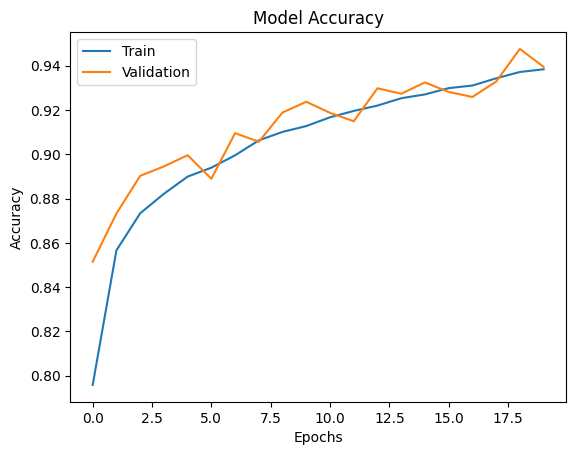

60000 784 10
Epoch 1/25
469/469 [==============================] - 7s 13ms/step - loss: 1.8742 - accuracy: 0.4936 - val_loss: 1.3619 - val_accuracy: 0.6135
Epoch 2/25
469/469 [==============================] - 7s 15ms/step - loss: 1.1016 - accuracy: 0.6697 - val_loss: 0.9237 - val_accuracy: 0.7058
Epoch 3/25
469/469 [==============================] - 6s 12ms/step - loss: 0.8287 - accuracy: 0.7204 - val_loss: 0.7535 - val_accuracy: 0.7378
Epoch 4/25
469/469 [==============================] - 8s 16ms/step - loss: 0.7029 - accuracy: 0.7500 - val_loss: 0.6622 - val_accuracy: 0.7624
Epoch 5/25
469/469 [==============================] - 6s 12ms/step - loss: 0.6324 - accuracy: 0.7688 - val_loss: 0.6053 - val_accuracy: 0.7783
Epoch 6/25
469/469 [==============================] - 7s 15ms/step - loss: 0.5882 - accuracy: 0.7859 - val_loss: 0.5705 - val_accuracy: 0.7947
Epoch 7/25
469/469 [==============================] - 6s 12ms/step - loss: 0.5563 - accuracy: 0.8000 - val_loss: 0.5404 - val_acc

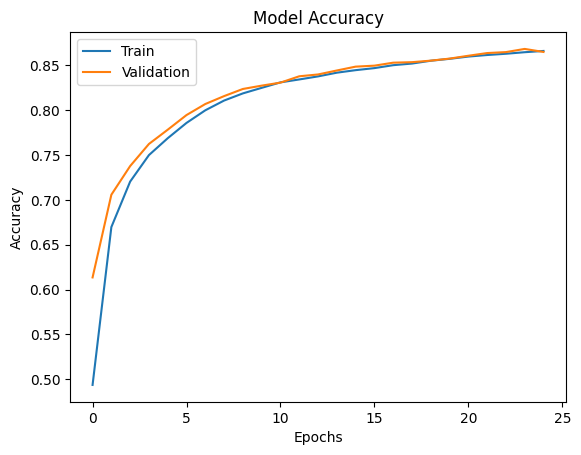

60000 784 10
Epoch 1/25
469/469 [==============================] - 8s 15ms/step - loss: 0.5449 - accuracy: 0.8057 - val_loss: 0.3883 - val_accuracy: 0.8592
Epoch 2/25
469/469 [==============================] - 9s 18ms/step - loss: 0.3622 - accuracy: 0.8681 - val_loss: 0.3625 - val_accuracy: 0.8655
Epoch 3/25
469/469 [==============================] - 7s 16ms/step - loss: 0.3258 - accuracy: 0.8806 - val_loss: 0.2924 - val_accuracy: 0.8917
Epoch 4/25
469/469 [==============================] - 8s 17ms/step - loss: 0.3006 - accuracy: 0.8888 - val_loss: 0.2757 - val_accuracy: 0.8973
Epoch 5/25
469/469 [==============================] - 7s 16ms/step - loss: 0.2805 - accuracy: 0.8965 - val_loss: 0.2674 - val_accuracy: 0.8985
Epoch 6/25
469/469 [==============================] - 7s 16ms/step - loss: 0.2669 - accuracy: 0.9006 - val_loss: 0.2470 - val_accuracy: 0.9067
Epoch 7/25
469/469 [==============================] - 8s 18ms/step - loss: 0.2569 - accuracy: 0.9033 - val_loss: 0.2622 - val_acc

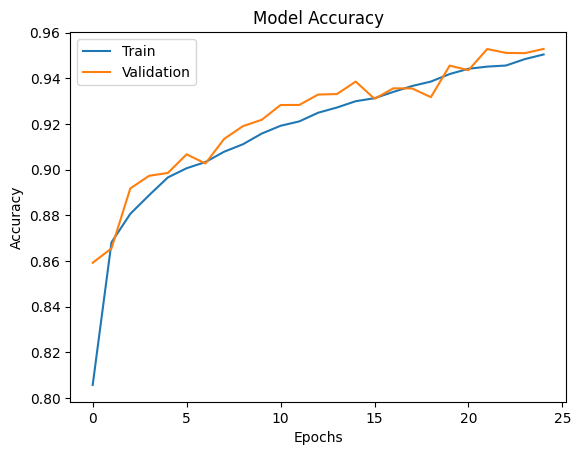

60000 784 10
Epoch 1/25
469/469 [==============================] - 10s 18ms/step - loss: 0.6068 - accuracy: 0.7773 - val_loss: 0.4464 - val_accuracy: 0.8307
Epoch 2/25
469/469 [==============================] - 7s 16ms/step - loss: 0.4086 - accuracy: 0.8485 - val_loss: 0.3389 - val_accuracy: 0.8742
Epoch 3/25
469/469 [==============================] - 7s 14ms/step - loss: 0.3560 - accuracy: 0.8692 - val_loss: 0.3366 - val_accuracy: 0.8730
Epoch 4/25
469/469 [==============================] - 8s 16ms/step - loss: 0.3269 - accuracy: 0.8791 - val_loss: 0.3236 - val_accuracy: 0.8797
Epoch 5/25
469/469 [==============================] - 6s 14ms/step - loss: 0.3063 - accuracy: 0.8856 - val_loss: 0.2876 - val_accuracy: 0.8918
Epoch 6/25
469/469 [==============================] - 8s 16ms/step - loss: 0.2874 - accuracy: 0.8930 - val_loss: 0.2852 - val_accuracy: 0.8906
Epoch 7/25
469/469 [==============================] - 6s 14ms/step - loss: 0.2737 - accuracy: 0.8971 - val_loss: 0.2627 - val_ac

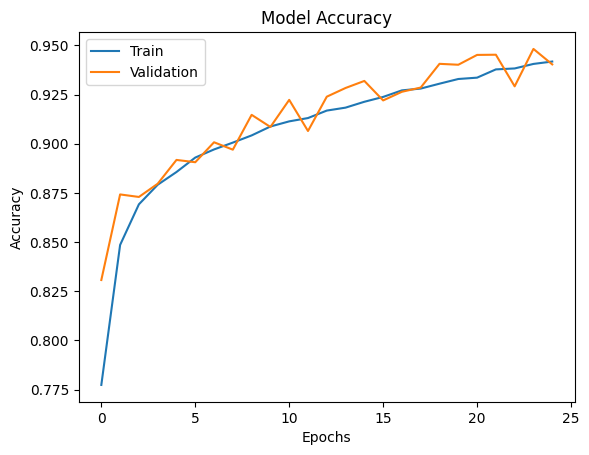

60000 784 10
Epoch 1/30
469/469 [==============================] - 8s 15ms/step - loss: 1.8689 - accuracy: 0.4933 - val_loss: 1.2590 - val_accuracy: 0.6411
Epoch 2/30
469/469 [==============================] - 7s 15ms/step - loss: 0.9938 - accuracy: 0.6851 - val_loss: 0.8258 - val_accuracy: 0.7335
Epoch 3/30
469/469 [==============================] - 7s 15ms/step - loss: 0.7405 - accuracy: 0.7437 - val_loss: 0.6766 - val_accuracy: 0.7570
Epoch 4/30
469/469 [==============================] - 6s 12ms/step - loss: 0.6361 - accuracy: 0.7678 - val_loss: 0.6048 - val_accuracy: 0.7783
Epoch 5/30
469/469 [==============================] - 7s 15ms/step - loss: 0.5781 - accuracy: 0.7890 - val_loss: 0.5568 - val_accuracy: 0.8007
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.5375 - accuracy: 0.8075 - val_loss: 0.5184 - val_accuracy: 0.8136
Epoch 7/30
469/469 [==============================] - 7s 15ms/step - loss: 0.5070 - accuracy: 0.8181 - val_loss: 0.4928 - val_acc

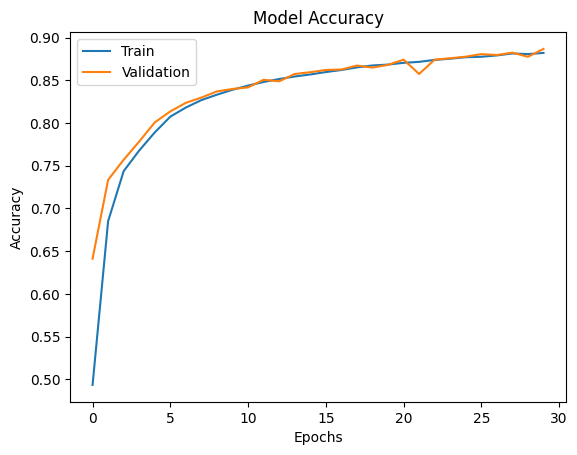

60000 784 10
Epoch 1/30
469/469 [==============================] - 9s 17ms/step - loss: 0.5390 - accuracy: 0.8070 - val_loss: 0.3809 - val_accuracy: 0.8580
Epoch 2/30
469/469 [==============================] - 8s 17ms/step - loss: 0.3710 - accuracy: 0.8648 - val_loss: 0.3183 - val_accuracy: 0.8839
Epoch 3/30
469/469 [==============================] - 7s 14ms/step - loss: 0.3315 - accuracy: 0.8774 - val_loss: 0.3008 - val_accuracy: 0.8887
Epoch 4/30
469/469 [==============================] - 9s 18ms/step - loss: 0.3078 - accuracy: 0.8862 - val_loss: 0.2950 - val_accuracy: 0.8899
Epoch 5/30
469/469 [==============================] - 8s 17ms/step - loss: 0.2896 - accuracy: 0.8913 - val_loss: 0.2719 - val_accuracy: 0.8987
Epoch 6/30
469/469 [==============================] - 8s 16ms/step - loss: 0.2715 - accuracy: 0.8984 - val_loss: 0.2559 - val_accuracy: 0.9038
Epoch 7/30
469/469 [==============================] - 8s 16ms/step - loss: 0.2574 - accuracy: 0.9046 - val_loss: 0.2458 - val_acc

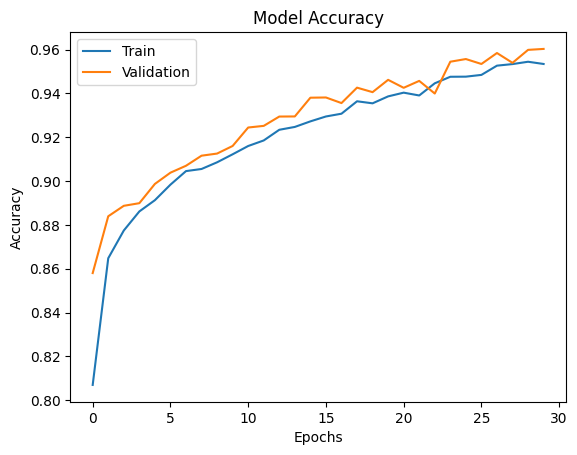

60000 784 10
Epoch 1/30
469/469 [==============================] - 9s 17ms/step - loss: 0.6080 - accuracy: 0.7747 - val_loss: 0.5145 - val_accuracy: 0.7905
Epoch 2/30
469/469 [==============================] - 7s 14ms/step - loss: 0.4126 - accuracy: 0.8469 - val_loss: 0.4582 - val_accuracy: 0.8399
Epoch 3/30
469/469 [==============================] - 9s 19ms/step - loss: 0.3653 - accuracy: 0.8655 - val_loss: 0.4292 - val_accuracy: 0.8299
Epoch 4/30
469/469 [==============================] - 8s 17ms/step - loss: 0.3359 - accuracy: 0.8755 - val_loss: 0.3527 - val_accuracy: 0.8679
Epoch 5/30
469/469 [==============================] - 9s 19ms/step - loss: 0.3137 - accuracy: 0.8815 - val_loss: 0.2947 - val_accuracy: 0.8858
Epoch 6/30
469/469 [==============================] - 8s 17ms/step - loss: 0.2977 - accuracy: 0.8890 - val_loss: 0.2666 - val_accuracy: 0.8985
Epoch 7/30
469/469 [==============================] - 7s 14ms/step - loss: 0.2824 - accuracy: 0.8935 - val_loss: 0.2721 - val_acc

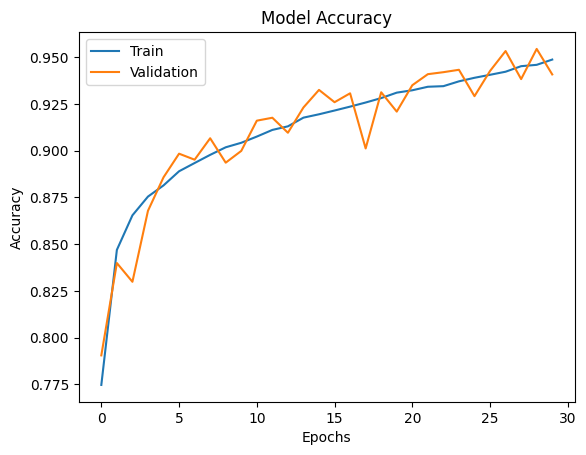

In [ ]:
#Grafico de cada uno de los distintos casos utilizados para el rendimiento de redes del FeedForward
import matplotlib.pyplot as plt
import keras

# Gráfico 1
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 512
h2 = 256
h3 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
h = red.fit(X, Y,
            epochs=20,
            batch_size=128,
            validation_data=(X, Y))

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico 2
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 512
h2 = 256
h3 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
h = red.fit(X, Y,
            epochs=20,
            batch_size=128,
            validation_data=(X, Y))

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico 3
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 512
h2 = 256
h3 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
h = red.fit(X, Y,
            epochs=20,
            batch_size=128,
            validation_data=(X, Y))

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico 4
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 256
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
h = red.fit(X, Y,
            epochs=25,
            batch_size=128,
            validation_data=(X, Y))

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico 5
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 256
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
h = red.fit(X, Y,
            epochs=25,
            batch_size=128,
            validation_data=(X, Y))

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico 6
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 256
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
h = red.fit(X, Y,
            epochs=25,
            batch_size=128,
            validation_data=(X, Y))

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico 7
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 128
h5 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(h4, activation='tanh', name='quinta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)
h = red.fit(X, Y,
            epochs=30,
            batch_size=128,
            validation_data=(X, Y))

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico 8
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 128
h5 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(h4, activation='tanh', name='quinta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
h = red.fit(X, Y,
            epochs=30,
            batch_size=128,
            validation_data=(X, Y))

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Gráfico 9
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 128
h5 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(h4, activation='tanh', name='quinta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
h = red.fit(X, Y,
            epochs=30,
            batch_size=128,
            validation_data=(X, Y))

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


**A partir de estos gráficos, podemos obtener algunas conclusiones:**

En los primeros tres gráficos, se utilizan diferentes optimizadores (SGD, Adam y RMSprop) con una arquitectura de red neuronal de tres capas ocultas (512-256-128) y se observa cómo evoluciona la precisión a lo largo de las épocas de entrenamiento. 
En general, los tres optimizadores logran un aumento en la precisión tanto en el conjunto de entrenamiento como en el de validación a medida que se incrementan las épocas. En este caso, Adam muestra un rendimiento más rápido y alcanza una mayor precisión en comparación con SGD y RMSprop.

En los gráficos siguientes, se agrega una capa adicional a la arquitectura de red neuronal (256-256-128-256) y se mantienen los mismos tres optimizadores. También se aumenta el número de épocas de entrenamiento a 25. 

Al comparar estos gráficos con los anteriores, podemos observar que agregar una capa adicional puede conducir a una mayor precisión en el conjunto de entrenamiento, pero no necesariamente mejora la precisión en el conjunto de validación. Además, el rendimiento de Adam sigue siendo notablemente mejor en términos de velocidad de convergencia y precisión final.

En los últimos tres gráficos, se mantiene la arquitectura de red neuronal con cinco capas ocultas (256-256-128-128-128) y se aumenta el número de épocas de entrenamiento a 30. 

En comparación con los gráficos anteriores, podemos observar que agregar más capas ocultas no necesariamente conduce a una mejora significativa en la precisión, ya que el rendimiento en el conjunto de validación muestra cierta fluctuación. Además, Adam sigue siendo el optimizador más eficaz en términos de convergencia y precisión.

## **Insertar el detalle de la cantidad de parámetros de la red neuronal artificial.**

In [ ]:
# Gráfico 1
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 512
h2 = 256
h3 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.summary()

60000 784 10
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Gráfico 2
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 512
h2 = 256
h3 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.summary()


60000 784 10
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Gráfico 3
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 512
h2 = 256
h3 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.summary()



60000 784 10
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 512)               401920    
                                                                 
 segunda_capa (Dense)        (None, 256)               131328    
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Gráfico 4
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 256
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.summary()


60000 784 10
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 cuarta_capa (Dense)         (None, 256)               33024     
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 335,242
Trainable params: 335,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Gráfico 5
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 256
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.summary()


60000 784 10
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 cuarta_capa (Dense)         (None, 256)               33024     
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 335,242
Trainable params: 335,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Gráfico 6
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 256
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.summary()


60000 784 10
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 cuarta_capa (Dense)         (None, 256)               33024     
                                                                 
 capa_de_output (Dense)      (None, 10)                2570      
                                                                 
Total params: 335,242
Trainable params: 335,242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Gráfico 7
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 128
h5 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(h4, activation='tanh', name='quinta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.summary()


60000 784 10
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 cuarta_capa (Dense)         (None, 128)               16512     
                                                                 
 quinta_capa (Dense)         (None, 128)               16512     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 333,962
Trainable params: 

In [ ]:
# Gráfico 8
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 128
h5 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(h4, activation='tanh', name='quinta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.summary()


60000 784 10
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 cuarta_capa (Dense)         (None, 128)               16512     
                                                                 
 quinta_capa (Dense)         (None, 128)               16512     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 333,962
Trainable params: 

In [ ]:
# Gráfico 9
M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]
print(M, N, C)
h1 = 256
h2 = 256
h3 = 128
h4 = 128
h5 = 128
red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(h4, activation='tanh', name='quinta_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_output'))
red.summary()


60000 784 10
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 cuarta_capa (Dense)         (None, 128)               16512     
                                                                 
 quinta_capa (Dense)         (None, 128)               16512     
                                                                 
 capa_de_output (Dense)      (None, 10)                1290      
                                                                 
Total params: 333,962
Trainable params: 

# Parte 3. Regularización

Realizar **regularización del modelo que están implementado** desde la experiencia anterior, **aplicando Dropout y L2**, además deben conseguir mejorar el desempeño del modelo.

Ejecuten una vez su red, **registrando el resultado obtenido. Intenten mejorar lo máximo posible la generalización del modelo, aumentando  el accuracy y disminuyendo el Loss**. 


**Recuerden evidenciar los resultados de la primera y la mejor ejecución en la tabla que está después del código.**

**Inserte el código de su modelo-arquitectura**

In [ ]:
#####################################################
#Entrenen aquí su red sin regularización y usando Descenso de gradiente estocástico (SGD)
#Registren el primer resultado del val accuracy y el loss en la tabla de más abajo

np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256


red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer= 'sgd',
    metrics=['accuracy']
)


h = red.fit(X, Y,
        epochs=30,
        batch_size=128,
        validation_data=(X, Y),
       )

########################################################

60000 784 10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 cuarta_capa (Dense)         (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,242
Trainable params: 335,242
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
469/469 [===============

Apliquen técnicas de regularización y registren los resultados:

In [ ]:
#####################################################
#Entrenen aquí su red con Dropout (encuentren y registren el porcentaje que maximice el desempeño de la red)

np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256


red_Dropout = keras.Sequential()
red_Dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red_Dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red_Dropout.add(keras.layers.Dropout(0.5))
red_Dropout.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red_Dropout.add(keras.layers.Dropout(0.3))
red_Dropout.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(C, activation='softmax'))

red_Dropout.summary()

red_Dropout.compile(
    loss='categorical_crossentropy',
    optimizer= 'adam',
    metrics=['accuracy']
)


h = red_Dropout.fit(X, Y,
        epochs=30,
        batch_size=128,
        validation_data=(X, Y),
       )

#####################################################

60000 784 10
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 cuarta_capa (Dense)         (None, 256)               33024     
                                                                 
 dropout_2 (Dropout)         (None, 256) 

In [ ]:
#####################################################
#Entrenen aquí su red con L2 (encuentren y registren el lambda(λ) que maximiza el desempeño de la red)



np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256


lambda_val = 0.01  
# Valor de lambda para la regularización L2

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', kernel_regularizer=regularizers.l2(lambda_val), name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', kernel_regularizer=regularizers.l2(lambda_val), name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', kernel_regularizer=regularizers.l2(lambda_val), name='tercera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', kernel_regularizer=regularizers.l2(lambda_val), name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h = red.fit(X, Y,
            epochs=30,
            batch_size=128,
            validation_data=(X, Y)
            )


#####################################################

60000 784 10
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 cuarta_capa (Dense)         (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,242
Trainable params: 335,242
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
469/469 [===============

Registren los resultados obtenidos en la tabla a continuación.

$$
\begin{aligned}
& \hspace{25mm} \text  {Tabla 1.1. Aplicando Regularización }\\
&\begin{array}{cccc}
\\
\hline \hline \text {     }\hspace{20mm} & \text  { Parámetro }\hspace{10mm}& \text { Val_acc }\hspace{10mm} \text { Loss } \\\hline
\text{ Primer resultado* } & { - } & {0.8762-0.3520} & {} & {} & {} & {} \\
\hline
\text{ Dropout (%) } & {0.5/0.3/0.1} & {0.9481-0.1684} & {} & {} & {} & {} \\
\text{ L2 (λ) } & {0.01} & {0.8052-0.7470} & {} & {} & {} & {} \\
\hline
\end{array}
\end{aligned}
$$

*Entrenamiento sin técnicas de regularización

### Análisis de Resultados

Se puede concluir que tanto el Dropout como la regularización L2 son técnicas efectivas para mejorar la precisión y reducir la pérdida en el modelo. 
El Dropout muestra la mayor mejora en términos de precisión, mientras que la regularización L2 proporciona una mejora moderada pero ayuda a controlar la complejidad del modelo y prevenir el sobreajuste.

En base a los resultados, se puede concluir que la técnica de Dropout con un porcentaje 0.1 sería la mejor opción en términos de precisión.

#  Parte 4. Aplica el método **Early Stopping** que permita optimizar un entrenamiento.  


In [ ]:
#######################################################################
#Código inicial sin dropout ni L2 con Early Stopping, optimizador Neutral de SGD

np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10)

h = red.fit(X, Y,
            epochs=30,
            batch_size=128,
            validation_data=(X, Y),
            callbacks=[early_stopping]
            )

############################################################

60000 784 10
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 cuarta_capa (Dense)         (None, 256)               33024     
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,242
Trainable params: 335,242
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
469/469 [==============

In [ ]:
#####################################################
#Aplicando metodo Early stoppid a modelo con Dropout del punto anterior

np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256

red_Dropout = keras.Sequential()
red_Dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red_Dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red_Dropout.add(keras.layers.Dropout(0.5))
red_Dropout.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red_Dropout.add(keras.layers.Dropout(0.3))
red_Dropout.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(C, activation='softmax'))

red_Dropout.summary()

red_Dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=10)

h = red_Dropout.fit(X, Y,
                    epochs=30,
                    batch_size=128,
                    validation_data=(X, Y),
                    callbacks=[early_stopping]
                    )


#####################################################

60000 784 10
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 dropout_22 (Dropout)        (None, 256)               0         
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 cuarta_capa (Dense)         (None, 256)               33024     
                                                                 
 dropout_24 (Dropout)        (None, 256)

In [ ]:
#####################################################
#Aplicando metodo Early stoppid a modelo con L2 del punto anterior


np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256


lambda_val = 0.01  
# Valor de lambda para la regularización L2

red = keras.Sequential()
red.add(keras.layers.Dense(h1, input_dim=N, activation='relu', kernel_regularizer=regularizers.l2(lambda_val), name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='tanh', kernel_regularizer=regularizers.l2(lambda_val), name='segunda_capa'))
red.add(keras.layers.Dense(h3, activation='sigmoid', kernel_regularizer=regularizers.l2(lambda_val), name='tercera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', kernel_regularizer=regularizers.l2(lambda_val), name='cuarta_capa'))
red.add(keras.layers.Dense(C, activation='softmax'))

red.summary()

red.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h = red.fit(X, Y,
            epochs=30,
            batch_size=128,
            validation_data=(X, Y)
            )


#####################################################

60000 784 10
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 cuarta_capa (Dense)         (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 335,242
Trainable params: 335,242
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
469/469 [==============

Aplicar al modelo que construyeron el método Early Stopping

In [ ]:
###########################################################
#Aplicando metodo Early Stopping a red neuronal seleccionada por el equipo. 

np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256

red_Dropout = keras.Sequential()
red_Dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red_Dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red_Dropout.add(keras.layers.Dropout(0.01))
red_Dropout.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red_Dropout.add(keras.layers.Dropout(0.01))
red_Dropout.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red_Dropout.add(keras.layers.Dropout(0.01))
red_Dropout.add(keras.layers.Dense(C, activation='softmax'))

red_Dropout.summary()

red_Dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

h = red_Dropout.fit(X, Y,
        epochs=30,
        batch_size=128,
        validation_data=(X, Y),
        callbacks=[early_stopping]
       )

###########################################################

60000 784 10
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 dropout_26 (Dropout)        (None, 128)               0         
                                                                 
 cuarta_capa (Dense)         (None, 256)               33024     
                                                                 
 dropout_27 (Dropout)        (None, 256)

Análisis de Resultados

Early Stopping es una técnica utilizada durante el entrenamiento de modelos de aprendizaje automático para evitar el sobreajuste y mejorar el rendimiento general del modelo. Consiste en monitorear una métrica relevante, como la pérdida o la precisión, en un conjunto de validación durante el entrenamiento y detener el entrenamiento prematuramente cuando la métrica deja de mejorar.

Código inicial sin dropout ni L2 con Early Stopping, optimizador Neutral de SGD: **Precisión en entrenamiento: 0.8726, Precisión en validación: 0.8756**

Aplicando metodo Early stoppid a modelo con Dropout del punto anterior
: **Precisión en entrenamiento: 0.9380, Precisión en validación: 0.9401**

Aplicando metodo Early stoppid a modelo con L2 del punto anterior
: **Precisión en entrenamiento: 0.8324, Precisión en validación: 0.8168**

Aplicando metodo Early Stopping a red neuronal seleccionada por el equipo: **Precisión en entrenamiento: 0.9568, Precisión en validación: 0.9528**

Como podemos ver, los resultados el modelo realizado por el equipo y junto al Early Stopping generó mucho mejores resultados en comparación a los otros, con una precisión de aproximadamente 0.957 en entrenamiento y 0.953 en validación.

De igual forma si los comparamos con la parte 3, los modelos mejoraron en un porcentaje.

# Parte 5. Optimizadores

Realizar **optimización del modelo** implementado en el caso Forma A, evidenciando una mejora en el desempeño del modelo a través del uso de las diferentes funciones de optimización que han aprendido.

**Registren los resultados obtenidos**.
Intenten **mejorar la generalización del modelo** de modo que puedan contrastar las primeras ejecuciones utilizando SGD versus las ejecuciones utilizando otro optimizador.

**Recuerden evidenciar los resultados de la primera y la mejor ejecución**


**IMPORTANTE:** Para que puedan observar como impactan los diferentes optimizadores en el entrenamiento, se recomienda mantener fijos todos los otros hiperparámetros (Ej: utilizar el mismo número de capas y neuronas por capa para experimentar con los diferentes optimizadores)

Registren los resultados obtenidos y detallen la variación que tuvo esta implementación respecto de la primera mejor ejecución con SGD sin optimizador.

In [ ]:

np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256


red_Dropout = keras.Sequential()
red_Dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red_Dropout.add(keras.layers.Dropout(0.2))
red_Dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red_Dropout.add(keras.layers.Dropout(0.2))
red_Dropout.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red_Dropout.add(keras.layers.Dropout(0.2))
red_Dropout.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red_Dropout.add(keras.layers.Dropout(0.2))
red_Dropout.add(keras.layers.Dense(C, activation='softmax'))

red_Dropout.summary()

red_Dropout.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

h = red_Dropout.fit(X, Y,
                   epochs=30,
                   batch_size=128,
                   validation_data=(X, Y)
                  )

60000 784 10
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 dropout_30 (Dropout)        (None, 128)               0         
                                                                 
 cuarta_capa (Dense)         (None, 256)

Resultados obtenidos sin optimizador

**Recuerden que deben completar los valores dentro de las llaves de las líneas así :**
>* Ejemplo: \hline \text{ 3 capas } & \text { 10 epocas} & {5} & {2} & {1} & {9} & {5} & {3} \\

---

$$
\begin{aligned}
& \hspace{10mm} \text {Tabla 1.1. Mejor resultado con SGD con Dropout(20%) }\\
&\begin{array}{cccc}
\hline \text {  N° Capas  } &\hspace{6mm} \text { N° Épocas } & \text { Val_Acc} & \text { Loss } \\
\hline \text{ 4 capas } & \text { 30 epocas} & {0.8645} & {0.4413} \\
\hline
\end{array}
\end{aligned}
$$


Implementación de Optimizadores **manteniendo la arquitectura inicial**:

Incorporen al modelo que están entrenando, el uso del optimizador ADAM, RMsPROP y al menos otro optimizador. Es importante que vayan registrando los resultados obtenidos, que les ayudará a analizar los resultados finales, y la importancia de los ajustes y arquitecturas utilizadas.

In [ ]:
#####################################################
#Mejoren el modelo con uso de optimizador ADAM.

np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256


red_Dropout = keras.Sequential()
red_Dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(C, activation='softmax'))

red_Dropout.summary()

red_Dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

h = red_Dropout.fit(X, Y,
                   epochs=30,
                   batch_size=128,
                   validation_data=(X, Y)
                  )

#####################################################

60000 784 10
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 dropout_11 (Dropout)        (None, 256)               0         
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 cuarta_capa (Dense)         (None, 256) 

In [ ]:
########################################################
#Mejoren el modelo con uso de optimizador RMSProp.


np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256


red_Dropout = keras.Sequential()
red_Dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(C, activation='softmax'))

red_Dropout.summary()

red_Dropout.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

h = red_Dropout.fit(X, Y,
                   epochs=30,
                   batch_size=128,
                   validation_data=(X, Y)
                  )
########################################################

60000 784 10
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 cuarta_capa (Dense)         (None, 256) 

In [ ]:
########################################################
#Mejoren el modelo con uso de otro optimizador aprendido.

np.random.seed(30)
tf.random.set_seed(30)

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M, N, C)

h1 = 256
h2 = 256
h3 = 128
h4 = 256


red_Dropout = keras.Sequential()
red_Dropout.add(keras.layers.Dense(h1, input_dim=N, activation='relu', name='primera_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(h2, activation='tanh', name='segunda_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(h3, activation='sigmoid', name='tercera_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(h4, activation='relu', name='cuarta_capa'))
red_Dropout.add(keras.layers.Dropout(0.1))
red_Dropout.add(keras.layers.Dense(C, activation='softmax'))

red_Dropout.summary()

red_Dropout.compile(
    loss='categorical_crossentropy',
    optimizer='adagrad',
    metrics=['accuracy']
)

h = red_Dropout.fit(X, Y,
                   epochs=30,
                   batch_size=128,
                   validation_data=(X, Y)
                  )

########################################################

60000 784 10
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 primera_capa (Dense)        (None, 256)               200960    
                                                                 
 dropout_18 (Dropout)        (None, 256)               0         
                                                                 
 segunda_capa (Dense)        (None, 256)               65792     
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 tercera_capa (Dense)        (None, 128)               32896     
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                                 
 cuarta_capa (Dense)         (None, 256) 

Ahora, registren aquí lo valores del mejor entrenamiento que obtuvieron con los diferentes optimizadores para luego analizar cual es la importancia del uso de estos algoritmos.

$$
\begin{aligned}
& \hspace{60mm} \text {Tabla 1.2. Comparando Optimizadores }\\
&\begin{array}{cccc}
\hline \hline \text {  N° Capas  } & \text { N° Épocas } & \text { SGD } & \text { ADAM } & \text { RMsProp } & \text { Adragrad } \\
\hline \hline \text {    } & \text {  } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text{ Loss } & \text { val_acc }\hspace{10mm} \text { Loss } & \text { val_acc }\hspace{10mm} \text { Loss }\\
\hline \text{ 3 capas } & \text { 10 epocas} & {0.8645-0.4413} & { 0.9443- 0.1693} & {0.9419-0.1910} & {0.8030 - 0.6000}  & {} & {} & {} & {}\\
\hline
\end{array}
\end{aligned}
$$


## Importancia de optimizadores:

Basado en las actividades realizadas, respondan lo siguiente:

1. Fundamenten y expliquen **la importancia de las funciones de optimización** dentro de un modelo de red neuronal.

R: La elección del optimizador puede tener un impacto significativo en el rendimiento del modelo, y es importante considerar y experimentar con diferentes optimizadores para obtener los mejores resultados en un problema de aprendizaje automático específico.

2. Fundamenten cuál es la importancia de **escoger el optimizador "adecuado" en relación al problema** que se intenta resolver según los recursos de aprendizaje de la asignatura.

R: Los resultados demuestran la importancia de elegir un optimizador adecuado, ya que puede tener un impacto significativo en el rendimiento del modelo. 

el optimizador ADAM mostró un mejor rendimiento en comparación con los otros optimizadores evaluados. Esto sugiere que, para este problema específico, ADAM fue capaz de encontrar una configuración de pesos que produjo una mayor precisión y una menor pérdida.


3. De acuerdo a la experiencia **fundamenten el uso de optimizadores donde la tasa de aprendizaje es constante versus otros optimizadores donde la tasa es adaptativa**. Complementen con ejemplos de optimizadores de ambas clases.


R:Los optimizadores con tasa de aprendizaje constante son simples y estables, lo que los hace fáciles de implementar y entender. Sin embargo, requieren ajuste manual y pueden ser sensibles a la elección inicial de la tasa de aprendizaje, lo que puede afectar el rendimiento y la convergencia del modelo. Por otro lado, los optimizadores con tasa de aprendizaje adaptativa ajustan automáticamente la tasa en función de las características del modelo y los datos, lo que les permite adaptarse a diferentes escenarios y converger más rápido en general. Aunque pueden requerir más tiempo de cómputo, ofrecen la ventaja de no requerir ajuste manual y ser más robustos frente a cambios en la tasa de aprendizaje.

Los claros ejemplos al ver este documento son los optimizadores utilizados aquí:

Optimizadores con tasa de aprendizaje constante: SGD
Optimizadores con tasa de aprendizaje adaptativa: Adagrad, RMSProp, Adam